___
# Ciência dos Dados - PROJETO 1

Tiago Reis Mingossi

Analizando a taxa de aumento do acesso a tv e internet em cada estado

___
## Introdução

Em meu projeto pretendo mostrar os valores graficamente da quantidade de pessoas que possuem o acesso tanto a internet quanto ao sinal digital de televisão entre os anos de 2013, 2014 e 2015. Dessa forma, após conseguir filtrar esses dados irei calcular as taxas de variações, sendo de aumento ou de decaimento, do acesso desses dois meios tecnologicos em cada estado. Por fim irei concuir sobre qual estado possui a maior taxa de variação e qual possui a menor taxa de variação. 

___
## Análise e Resultados 2015

In [107]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [108]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\jming\Downloads


In [109]:
#Se usar o arquivo descompactado
tabela= pd.read_csv('DOM2015.csv',sep=',')
tabela2= pd.read_csv('DOM2014.csv',sep=',')
tabela3= pd.read_csv('DOM2013.csv',sep=',')
#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [110]:
tabela.loc[(tabela.UF>11)&(tabela.UF<20),'REGIAO'] = 'Norte'
tabela.loc[(tabela.UF>20)&(tabela.UF<30),'REGIAO'] = 'Nordeste'
tabela.loc[(tabela.UF>30)&(tabela.UF<40),'REGIAO'] = 'Sudeste'
tabela.loc[(tabela.UF>40)&(tabela.UF<50),'REGIAO'] = 'Sul'
tabela.loc[(tabela.UF>50),'REGIAO'] = 'Centro-Oeste'
tabela.UF = tabela.UF.astype('category')
tabela.REGIAO = tabela.REGIAO.astype('category')

In [111]:
tabela.loc[(tabela.V4105<=3),'ÁREA'] = 'Urbana'
tabela.loc[(tabela.V4105>3),'ÁREA'] = 'Rural'
tabela.V4105 = tabela.V4105.astype('category')
tabela.ÁREA = tabela.ÁREA.astype('category')

In [112]:
tabela.V0101 = tabela.V0101.astype('int')

tabela.V0226 = tabela.V0226.astype('category')
tabela.V0226.cat.categories = (['Sim', 'Não'])

tabela.V02322 = tabela.V02322.astype('category')
tabela.V02322.cat.categories = (['Sim', 'Não'])

tabela.V02273 = tabela.V02273.astype('category')
tabela.V02273.cat.categories = (['Sim', 'Não', 'Não Sabe'])

tabela.V02424 = tabela.V02424.astype('category')
tabela.V02424.cat.categories = (['Sim', 'Não'])

tabela.V02426 = tabela.V02426.astype('category')
tabela.V02426.cat.categories = (['Sim', 'Não']) 

tabela.V4622 = tabela.V4622.astype('float')

In [113]:
tabela=tabela[(tabela.REGIAO=="Norte")&(tabela.V4622<=6)&(tabela.ÁREA=='Urbana')&(tabela.V02273=='Sim')&(tabela.V02424=='Sim')&(tabela.V02426=='Sim')&(tabela.V0226=='Sim')&(tabela.V02322=='Sim')|(tabela.REGIAO=="Norte")&(tabela.V4622<=6)&(tabela.ÁREA=='Rural')&(tabela.V02273=='Sim')&(tabela.V02424=='Sim')&(tabela.V02426=='Sim')&(tabela.V0226=='Sim')&(tabela.V02322=='Sim')|(tabela.REGIAO=="Nordeste")&(tabela.V4622<=6)&(tabela.ÁREA=='Urbana')&(tabela.V02273=='Sim')&(tabela.V02424=='Sim')&(tabela.V02426=='Sim')&(tabela.V0226=='Sim')&(tabela.V02322=='Sim')|(tabela.REGIAO=="Nordeste")&(tabela.V4622<=6)&(tabela.ÁREA=='Rural')&(tabela.V02273=='Sim')&(tabela.V02424=='Sim')&(tabela.V02426=='Sim')&(tabela.V0226=='Sim')&(tabela.V02322=='Sim')|(tabela.REGIAO=="Sudeste")&(tabela.V4622<=6)&(tabela.ÁREA=='Urbana')&(tabela.V02273=='Sim')&(tabela.V02424=='Sim')&(tabela.V02426=='Sim')&(tabela.V0226=='Sim')&(tabela.V02322=='Sim')|(tabela.REGIAO=="Sudeste")&(tabela.V4622<=6)&(tabela.ÁREA=='Rural')&(tabela.V02273=='Sim')&(tabela.V02424=='Sim')&(tabela.V02426=='Sim')&(tabela.V0226=='Sim')&(tabela.V02322=='Sim')|(tabela.REGIAO=="Sul")&(tabela.V4622<=6)&(tabela.ÁREA=='Urbana')&(tabela.V02273=='Sim')&(tabela.V02424=='Sim')&(tabela.V02426=='Sim')&(tabela.V0226=='Sim')&(tabela.V02322=='Sim')|(tabela.REGIAO=="Sul")&(tabela.V4622<=6)&(tabela.ÁREA=='Rural')&(tabela.V02273=='Sim')&(tabela.V02424=='Sim')&(tabela.V02426=='Sim')&(tabela.V0226=='Sim')&(tabela.V02322=='Sim')|(tabela.REGIAO=="Centro-Oeste")&(tabela.V4622<=6)&(tabela.ÁREA=='Urbana')&(tabela.V02273=='Sim')&(tabela.V02424=='Sim')&(tabela.V02426=='Sim')&(tabela.V0226=='Sim')&(tabela.V02322=='Sim')|(tabela.REGIAO=='Centro-Oeste')&(tabela.V4622<=6)&(tabela.ÁREA=='Rural')&(tabela.V02273=='Sim')&(tabela.V02424=='Sim')&(tabela.V02426=='Sim')&(tabela.V0226=='Sim')&(tabela.V02322=='Sim')]

In [114]:
tabela=tabela.loc[:,['V0101','UF','V0226','V02273','V02322','V02424','V02426','ÁREA','V4622','REGIAO']]
tabela.columns=(['ANO','ESTADO','TELEVISÃO_EM_CORES','SINAL_DIGITAL_E_TV_ABERTA','ACESSO_À_INTERNET','INTERNET_3G_E_4G','INTERNET_BANDA_LARGA','URBANA_OU_RURAL','ECONOMIA','REGIÃO'])

In [115]:
#tabela

In [116]:
tabela.shape

(15508, 10)

___
## Análise e Resultados 2014

In [117]:
tabela2.loc[(tabela2.UF>11)&(tabela2.UF<20),'REGIAO'] = 'Norte'
tabela2.loc[(tabela2.UF>20)&(tabela2.UF<30),'REGIAO'] = 'Nordeste'
tabela2.loc[(tabela2.UF>30)&(tabela2.UF<40),'REGIAO'] = 'Sudeste'
tabela2.loc[(tabela2.UF>40)&(tabela2.UF<50),'REGIAO'] = 'Sul'
tabela2.loc[(tabela2.UF>50),'REGIAO'] = 'Centro-Oeste'
tabela2.UF = tabela2.UF.astype('category')
tabela2.REGIAO = tabela2.REGIAO.astype('category')

In [118]:
tabela2.loc[(tabela2.V4105<=3),'ÁREA'] = 'Urbana'
tabela2.loc[(tabela2.V4105>3),'ÁREA'] = 'Rural'
tabela2.V4105 = tabela2.V4105.astype('category')
tabela2.ÁREA = tabela2.ÁREA.astype('category')

In [119]:
tabela2.V0101 = tabela2.V0101.astype('int')

tabela2.V0226 = tabela2.V0226.astype('category')
tabela2.V0226.cat.categories = (['Sim', 'Não'])

tabela2.V02322 = tabela2.V02322.astype('category')
tabela2.V02322.cat.categories = (['Sim', 'Não'])

tabela2.V02273 = tabela2.V02273.astype('category')
tabela2.V02273.cat.categories = (['Sim', 'Não', 'Não Sabe'])

tabela2.V02424 = tabela2.V02424.astype('category')
tabela2.V02424.cat.categories = (['Sim', 'Não'])

tabela2.V02426 = tabela2.V02426.astype('category')
tabela2.V02426.cat.categories = (['Sim', 'Não']) 

tabela2.V4622 = tabela2.V4622.astype('float')

In [120]:
tabela2=tabela2[(tabela2.REGIAO=="Norte")&(tabela2.V4622<=6)&(tabela2.ÁREA=='Urbana')&(tabela2.V02322=='Sim')&(tabela2.V02424=='Sim')&(tabela2.V02426=='Sim')&(tabela2.V0226=='Sim')&(tabela2.V02273=='Sim')|(tabela2.REGIAO=="Norte")&(tabela2.V4622<=6)&(tabela2.ÁREA=='Rural')&(tabela2.V02322=='Sim')&(tabela2.V02424=='Sim')&(tabela2.V02426=='Sim')&(tabela2.V0226=='Sim')&(tabela2.V02273=='Sim')|(tabela2.REGIAO=="Nordeste")&(tabela2.V4622<=6)&(tabela2.ÁREA=='Urbana')&(tabela2.V02322=='Sim')&(tabela2.V02424=='Sim')&(tabela2.V02426=='Sim')&(tabela2.V0226=='Sim')&(tabela2.V02273=='Sim')|(tabela2.REGIAO=="Nordeste")&(tabela2.V4622<=6)&(tabela2.ÁREA=='Rural')&(tabela2.V02322=='Sim')&(tabela2.V02424=='Sim')&(tabela2.V02426=='Sim')&(tabela2.V0226=='Sim')&(tabela2.V02273=='Sim')|(tabela2.REGIAO=="Sudeste")&(tabela2.V4622<=6)&(tabela2.ÁREA=='Urbana')&(tabela2.V02322=='Sim')&(tabela2.V02424=='Sim')&(tabela2.V02426=='Sim')&(tabela2.V0226=='Sim')&(tabela2.V02273=='Sim')|(tabela2.REGIAO=="Sudeste")&(tabela2.V4622<=6)&(tabela2.ÁREA=='Rural')&(tabela2.V02322=='Sim')&(tabela2.V02424=='Sim')&(tabela2.V02426=='Sim')&(tabela2.V0226=='Sim')&(tabela2.V02273=='Sim')|(tabela2.REGIAO=="Sul")&(tabela2.V4622<=6)&(tabela2.ÁREA=='Urbana')&(tabela2.V02322=='Sim')&(tabela2.V02424=='Sim')&(tabela2.V02426=='Sim')&(tabela2.V0226=='Sim')&(tabela2.V02273=='Sim')|(tabela2.REGIAO=="Sul")&(tabela2.V4622<=6)&(tabela2.ÁREA=='Rural')&(tabela2.V02322=='Sim')&(tabela2.V02424=='Sim')&(tabela2.V02426=='Sim')&(tabela2.V0226=='Sim')&(tabela2.V02273=='Sim')|(tabela2.REGIAO=="Centro-Oeste")&(tabela2.V4622<=6)&(tabela2.ÁREA=='Urbana')&(tabela2.V02322=='Sim')&(tabela2.V02424=='Sim')&(tabela2.V02426=='Sim')&(tabela2.V0226=='Sim')&(tabela2.V02273=='Sim')|(tabela2.REGIAO=="Centro-Oeste")&(tabela2.V4622<=6)&(tabela2.ÁREA=='Urbana')&(tabela2.V02322=='Sim')&(tabela2.V02424=='Sim')&(tabela2.V02426=='Sim')&(tabela2.V0226=='Sim')&(tabela2.V02273=='Sim')]

In [121]:
tabela2=tabela2.loc[:,['V0101','UF','V0226','V02273','V02322','V02424','V02426','ÁREA','V4622','REGIAO']]
tabela2.columns=(['ANO','ESTADO','TELEVISÃO_EM_CORES','SINAL_DIGITAL_E_TV_ABERTA','ACESSO_À_INTERNET','INTERNET_3G_E_4G','INTERNET_BANDA_LARGA','URBANA_OU_RURAL','ECONOMIA','REGIÃO'])

In [122]:
#tabela2

In [123]:
tabela2.shape

(11407, 10)

___
## Análise e Resultados 2013

In [124]:
tabela3.loc[(tabela3.UF>11)&(tabela3.UF<20),'REGIAO'] = 'Norte'
tabela3.loc[(tabela3.UF>20)&(tabela3.UF<30),'REGIAO'] = 'Nordeste'
tabela3.loc[(tabela3.UF>30)&(tabela3.UF<40),'REGIAO'] = 'Sudeste'
tabela3.loc[(tabela3.UF>40)&(tabela3.UF<50),'REGIAO'] = 'Sul'
tabela3.loc[(tabela3.UF>50),'REGIAO'] = 'Centro-Oeste'
tabela3.UF = tabela3.UF.astype('category')
tabela3.REGIAO = tabela3.REGIAO.astype('category')

In [125]:
tabela3.loc[(tabela3.V4105<=3),'ÁREA'] = 'Urbana'
tabela3.loc[(tabela3.V4105>3),'ÁREA'] = 'Rural'
tabela3.V4105 = tabela3.V4105.astype('category')
tabela3.ÁREA = tabela3.ÁREA.astype('category')

In [126]:
tabela3.V0101 = tabela3.V0101.astype('int')

tabela3.V0226 = tabela3.V0226.astype('category')
tabela3.V0226.cat.categories = (['Sim', 'Não'])

tabela3.V02322 = tabela3.V02322.astype('category')
tabela3.V02322.cat.categories = (['Sim', 'Não'])

tabela3.V02273 = tabela3.V02273.astype('category')
tabela3.V02273.cat.categories = (['Sim', 'Não', 'Não Sabe'])

tabela3.V02424 = tabela3.V02424.astype('category')
tabela3.V02424.cat.categories = (['Sim', 'Não'])

tabela3.V02426 = tabela3.V02426.astype('category')
tabela3.V02426.cat.categories = (['Sim', 'Não']) 

tabela3.V4622 = tabela3.V4622.astype('float')

In [127]:
tabela3=tabela3[(tabela3.REGIAO=='Norte')&(tabela3.V4622<=6)&(tabela3.ÁREA=='Urbana')&(tabela3.V02322=='Sim')&(tabela3.V02424=='Sim')&(tabela3.V02426=='Sim')&(tabela3.V0226=='Sim')&(tabela3.V02273=='Sim')|(tabela3.REGIAO=='Norte')&(tabela3.V4622<=6)&(tabela3.ÁREA=='Rural')&(tabela3.V02322=='Sim')&(tabela3.V02424=='Sim')&(tabela3.V02426=='Sim')&(tabela3.V0226=='Sim')&(tabela3.V02273=='Sim')|(tabela3.REGIAO=='Nordeste')&(tabela3.V4622<=6)&(tabela3.ÁREA=='Urbana')&(tabela3.V02322=='Sim')&(tabela3.V02424=='Sim')&(tabela3.V02426=='Sim')&(tabela3.V0226=='Sim')&(tabela3.V02273=='Sim')|(tabela3.REGIAO=='Nordeste')&(tabela3.V4622<=6)&(tabela3.ÁREA=='Rural')&(tabela3.V02322=='Sim')&(tabela3.V02424=='Sim')&(tabela3.V02426=='Sim')&(tabela3.V0226=='Sim')&(tabela3.V02273=='Sim')|(tabela3.REGIAO=='Sudeste')&(tabela3.V4622<=6)&(tabela3.ÁREA=='Urbana')&(tabela3.V02322=='Sim')&(tabela3.V02424=='Sim')&(tabela3.V02426=='Sim')&(tabela3.V0226=='Sim')&(tabela3.V02273=='Sim')|(tabela3.REGIAO=='Sudeste')&(tabela3.V4622<=6)&(tabela3.ÁREA=='Rural')&(tabela3.V02322=='Sim')&(tabela3.V02424=='Sim')&(tabela3.V02426=='Sim')&(tabela3.V0226=='Sim')&(tabela3.V02273=='Sim')|(tabela3.REGIAO=='Sul')&(tabela3.V4622<=6)&(tabela3.ÁREA=='Urbana')&(tabela3.V02322=='Sim')&(tabela3.V02424=='Sim')&(tabela3.V02426=='Sim')&(tabela3.V0226=='Sim')&(tabela3.V02273=='Sim')|(tabela3.REGIAO=="Sul")&(tabela3.V4622<=6)&(tabela3.ÁREA=='Rural')&(tabela3.V02322=='Sim')&(tabela3.V02424=='Sim')&(tabela3.V02426=='Sim')&(tabela3.V0226=='Sim')&(tabela3.V02273=='Sim')|(tabela3.REGIAO=='Centro-Oeste')&(tabela3.V4622<=6)&(tabela3.ÁREA=='Urbana')&(tabela3.V02322=='Sim')&(tabela3.V02424=='Sim')&(tabela3.V02426=='Sim')&(tabela3.V0226=='Sim')&(tabela3.V02273=='Sim')|(tabela3.REGIAO=='Centro-Oeste')&(tabela3.V4622<=6)&(tabela3.ÁREA=='Rural')&(tabela3.V02322=='Sim')&(tabela3.V02424=='Sim')&(tabela3.V02426=='Sim')&(tabela3.V0226=='Sim')&(tabela3.V02273=='Sim')]

In [128]:
tabela3=tabela3.loc[:,['V0101','UF','V0226','V02273','V02322','V02424','V02426','ÁREA','V4622','REGIAO']]
tabela3.columns=(['ANO','ESTADO','TELEVISÃO_EM_CORES','SINAL_DIGITAL_E_TV_ABERTA','ACESSO_À_INTERNET','INTERNET_3G_E_4G','INTERNET_BANDA_LARGA','URBANA_OU_RURAL','ECONOMIA','REGIÃO'])

In [129]:
#tabela3

In [130]:
tabela3.shape

(5408, 10)

___
## Gráficos e Tabelas

Nas tabela a baixo podemos observar a porcentagem tanto do acesso à intenet como do sinal digital em cada um dos estados,e para cada uma das áreas, rural ou urbana, para cada um dos anos. Pode-se observar que no (não) todas estao zeradas, pois foram apenas selecionadas as pessoas que possuem ambas das variaveis.

In [131]:
print('2015:')
ct1=pd.crosstab(tabela.ACESSO_À_INTERNET, tabela.REGIÃO, margins=True, rownames=['INTERNET'], colnames=['REGIÃO'], normalize=True)*100
print(ct1,'\n')
ct11=pd.crosstab(tabela.ACESSO_À_INTERNET, tabela.URBANA_OU_RURAL, margins=True, rownames=['INTERNET'], colnames=['ÀREA'], normalize=True)*100
print(ct11,'\n')
ct12=pd.crosstab(tabela.SINAL_DIGITAL_E_TV_ABERTA, tabela.REGIÃO, margins=True, rownames=['SINAL E TV'], colnames=['REGIÃO'], normalize=True)*100
print(ct12,'\n')
ct13=pd.crosstab(tabela.SINAL_DIGITAL_E_TV_ABERTA, tabela.URBANA_OU_RURAL, margins=True, rownames=['SINAL E TV'], colnames=['ÀREA'], normalize=True)*100
print(ct13,'\n','\n','\n')


print('2014:')
ct2=pd.crosstab(tabela2.ACESSO_À_INTERNET, tabela2.REGIÃO, margins=True, rownames=['INTERNET'], colnames=['REGIÃO'], normalize=True)*100
print(ct2,'\n')
ct21=pd.crosstab(tabela2.ACESSO_À_INTERNET, tabela2.URBANA_OU_RURAL, margins=True, rownames=['INTERNET'], colnames=['ÀREA'], normalize=True)*100
print(ct21,'\n')
ct22=pd.crosstab(tabela2.SINAL_DIGITAL_E_TV_ABERTA, tabela2.REGIÃO, margins=True, rownames=['SINAL E TV'], colnames=['REGIÃO'], normalize=True)*100
print(ct22,'\n')
ct23=pd.crosstab(tabela2.SINAL_DIGITAL_E_TV_ABERTA, tabela2.URBANA_OU_RURAL, margins=True, rownames=['SINAL E TV'], colnames=['ÀREA'], normalize=True)*100
print(ct23,'\n','\n','\n')


print('2013:')
ct3=pd.crosstab(tabela3.ACESSO_À_INTERNET, tabela3.REGIÃO, margins=True, rownames=['INTERNET'], colnames=['REGIÃO'], normalize=True)*100
print(ct3,'\n')
ct31=pd.crosstab(tabela3.ACESSO_À_INTERNET, tabela3.URBANA_OU_RURAL, margins=True, rownames=['INTERNET'], colnames=['ÀREA'], normalize=True)*100
print(ct31,'\n')
ct32=pd.crosstab(tabela3.SINAL_DIGITAL_E_TV_ABERTA, tabela3.REGIÃO, margins=True, rownames=['SINAL E TV'], colnames=['REGIÃO'], normalize=True)*100
print(ct32,'\n')
ct33=pd.crosstab(tabela3.SINAL_DIGITAL_E_TV_ABERTA, tabela3.URBANA_OU_RURAL, margins=True, rownames=['SINAL E TV'], colnames=['ÀREA'], normalize=True)*100
print(ct33,'\n')


2015:
REGIÃO    Centro-Oeste   Nordeste     Norte    Sudeste        Sul    All
INTERNET                                                                
Sim           10.60098  23.039721  8.092597  40.798298  17.468403  100.0
Não            0.00000   0.000000  0.000000   0.000000   0.000000    0.0
All           10.60098  23.039721  8.092597  40.798298  17.468403  100.0 

ÀREA         Rural     Urbana    All
INTERNET                            
Sim       1.534692  98.465308  100.0
Não       0.000000   0.000000    0.0
All       1.534692  98.465308  100.0 

REGIÃO      Centro-Oeste   Nordeste     Norte    Sudeste        Sul    All
SINAL E TV                                                                
Sim             10.60098  23.039721  8.092597  40.798298  17.468403  100.0
Não              0.00000   0.000000  0.000000   0.000000   0.000000    0.0
Não Sabe         0.00000   0.000000  0.000000   0.000000   0.000000    0.0
All             10.60098  23.039721  8.092597  40.798298  17.4684

___
Nos gráficos a baixo podemos analizar a porcentagem que cada região possui do total de domicílios analizados, para cada um dos anos. Em seguida há o número relativo de domicílios que cada uma das porcentagens representa.  

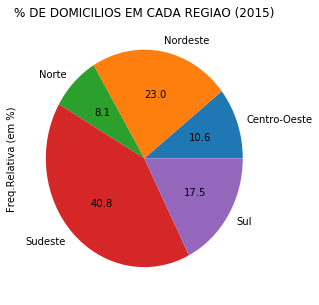

Centro-Oente:
1643.8480000000002
Nordeste:
3566.84
Norte:
1256.1480000000001
Sudeste:
6327.264
Sul:
2713.9

 



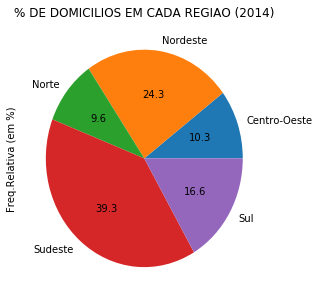

Centro-Oente:
1597.3240000000003
Nordeste:
3768.4440000000004
Norte:
1488.768
Sudeste:
6094.644
Sul:
2574.3280000000004

 



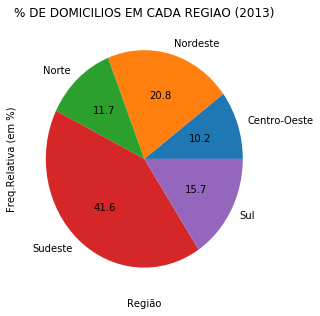

Centro-Oente:
1581.816
Nordeste:
3225.664
Norte:
1814.4360000000001
Sudeste:
6451.328
Sul:
2434.7560000000003

 



In [132]:
ut1 = (tabela.REGIÃO.value_counts(sort=False, normalize=True)*100).round(decimals=1)
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = ut1.plot(kind='pie',title='% DE DOMICILIOS EM CADA REGIAO (2015)',autopct='%.1f')
plt.ylabel('Freq.Relativa (em %)')
plt.show()
print('Centro-Oente:'),print((tabela.shape[0]/100)*10.6)
print('Nordeste:'),print((tabela.shape[0]/100)*23)
print('Norte:'),print((tabela.shape[0]/100)*8.1)
print('Sudeste:'),print((tabela.shape[0]/100)*40.8)
print('Sul:'),print((tabela.shape[0]/100)*17.5)
print('\n','\n')


ut2 = (tabela2.REGIÃO.value_counts(sort=False, normalize=True)*100).round(decimals=1)
fig = plt.figure(figsize=(15, 5))
plt.subplot(132)
plot = ut2.plot(kind='pie',title='% DE DOMICILIOS EM CADA REGIAO (2014)',autopct='%.1f')
plt.ylabel('Freq.Relativa (em %)')
plt.show()
print('Centro-Oente:'),print((tabela.shape[0]/100)*10.3)
print('Nordeste:'),print((tabela.shape[0]/100)*24.3)
print('Norte:'),print((tabela.shape[0]/100)*9.6)
print('Sudeste:'),print((tabela.shape[0]/100)*39.3)
print('Sul:'),print((tabela.shape[0]/100)*16.6)
print('\n','\n')


ut3 = (tabela3.REGIÃO.value_counts(sort=False, normalize=True)*100).round(decimals=1)
fig = plt.figure(figsize=(15, 5))
plt.subplot(133)
plot = ut3.plot(kind='pie',title='% DE DOMICILIOS EM CADA REGIAO (2013)',autopct='%.1f')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Região')
plt.show()
print('Centro-Oente:'),print((tabela.shape[0]/100)*10.2)
print('Nordeste:'),print((tabela.shape[0]/100)*20.8)
print('Norte:'),print((tabela.shape[0]/100)*11.7)
print('Sudeste:'),print((tabela.shape[0]/100)*41.6)
print('Sul:'),print((tabela.shape[0]/100)*15.7)
print('\n','\n')

___
Nos gráficos a baixo podemos analizar a porcentagem que cada faixa de renda possui do total de domicílios analizados, para cada um dos anos. Em seguida há o número relativo de domicílios que cada uma das porcentagens representa. 

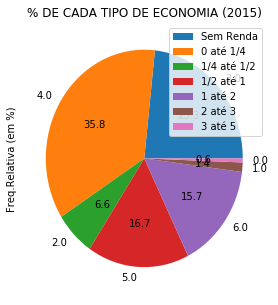

Sem Renda:
93.048
0 até 1/4:
217.112
1/4 até 1/2:
1023.528
1/2 até 1:
3613.3640000000005
1 até 2:
5551.864
2 até 3:
2589.8360000000002
3 até 5:
2434.7560000000003

 



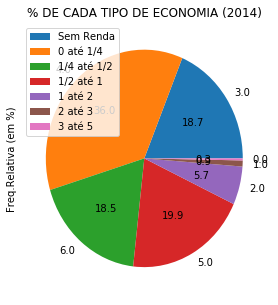

Sem Renda:
46.524
0 até 1/4:
139.572
1/4 até 1/2:
883.9560000000001
1/2 até 1:
2899.996
1 até 2:
5582.88
2 até 3:
3086.092
3 até 5:
2868.98

 



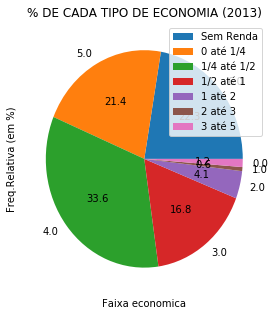

Sem Renda:
186.096
0 até 1/4:
93.048
1/4 até 1/2:
635.828
1/2 até 1:
2605.3440000000005
1 até 2:
5210.688000000001
2 até 3:
3318.712
3 até 5:
3458.2840000000006

 



In [133]:
ut11 = (tabela.ECONOMIA.value_counts(sort=False, normalize=True)*100).round(decimals=1)
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = ut11.plot(kind='pie',title='% DE CADA TIPO DE ECONOMIA (2015)',autopct='%.1f')
plt.ylabel('Freq.Relativa (em %)')
plt.legend(['Sem Renda','0 até 1/4','1/4 até 1/2','1/2 até 1','1 até 2','2 até 3','3 até 5'])
plt.show()
print('Sem Renda:'),print((tabela.shape[0]/100)*0.6)
print('0 até 1/4:'),print((tabela.shape[0]/100)*1.4)
print('1/4 até 1/2:'),print((tabela.shape[0]/100)*6.6)
print('1/2 até 1:'),print((tabela.shape[0]/100)*23.3)
print('1 até 2:'),print((tabela.shape[0]/100)*35.8)
print('2 até 3:'),print((tabela.shape[0]/100)*16.7)
print('3 até 5:'),print((tabela.shape[0]/100)*15.7)
print('\n','\n')


ut21 = (tabela2.ECONOMIA.value_counts(sort=False, normalize=True)*100).round(decimals=1)
fig = plt.figure(figsize=(15, 5))
plt.subplot(132)
plot = ut21.plot(kind='pie',title='% DE CADA TIPO DE ECONOMIA (2014)',autopct='%.1f')
plt.ylabel('Freq.Relativa (em %)')
plt.legend(['Sem Renda','0 até 1/4','1/4 até 1/2','1/2 até 1','1 até 2','2 até 3','3 até 5'])
plt.show()
print('Sem Renda:'),print((tabela.shape[0]/100)*0.3)
print('0 até 1/4:'),print((tabela.shape[0]/100)*0.9)
print('1/4 até 1/2:'),print((tabela.shape[0]/100)*5.7)
print('1/2 até 1:'),print((tabela.shape[0]/100)*18.7)
print('1 até 2:'),print((tabela.shape[0]/100)*36)
print('2 até 3:'),print((tabela.shape[0]/100)*19.9)
print('3 até 5:'),print((tabela.shape[0]/100)*18.5)
print('\n','\n')


ut31 = (tabela3.ECONOMIA.value_counts(sort=False, normalize=True)*100).round(decimals=1)
fig = plt.figure(figsize=(15, 5))
plt.subplot(133)
plot = ut31.plot(kind='pie',title='% DE CADA TIPO DE ECONOMIA (2013)',autopct='%.1f')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Faixa economica')
plt.legend(['Sem Renda','0 até 1/4','1/4 até 1/2','1/2 até 1','1 até 2','2 até 3','3 até 5'])
plt.show()
print('Sem Renda:'),print((tabela.shape[0]/100)*1.2)
print('0 até 1/4:'),print((tabela.shape[0]/100)*0.6)
print('1/4 até 1/2:'),print((tabela.shape[0]/100)*4.1)
print('1/2 até 1:'),print((tabela.shape[0]/100)*16.8)
print('1 até 2:'),print((tabela.shape[0]/100)*33.6)
print('2 até 3:'),print((tabela.shape[0]/100)*21.4)
print('3 até 5:'),print((tabela.shape[0]/100)*22.3)
print('\n','\n')

___
Nos gráficos a baixo podemos analizar as difetentes faixas de renda, e a sua porcentagem em que cada um dos estados, dividindo-os em  zona rural e zona urbana:

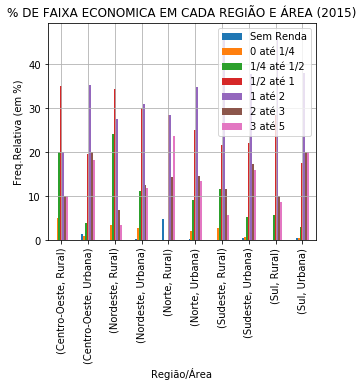

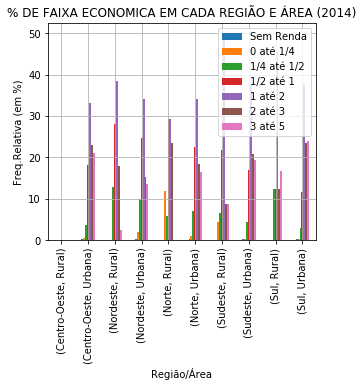

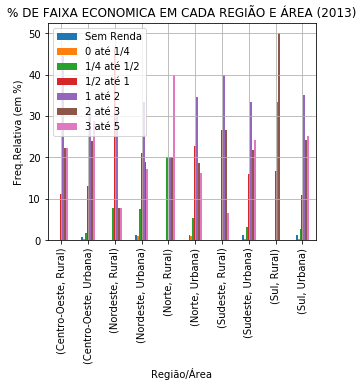

In [134]:
A=(pd.crosstab([tabela.REGIÃO, tabela.URBANA_OU_RURAL],tabela.ECONOMIA, normalize='index')*100).round(decimals=1)
A
plot=A.plot(kind='bar',title='% DE FAIXA ECONOMICA EM CADA REGIÃO E ÁREA (2015)')
ax=plt.subplot(111)
box=ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Região/Área')
plt.legend(['Sem Renda','0 até 1/4','1/4 até 1/2','1/2 até 1','1 até 2','2 até 3','3 até 5'])
plt.grid()
plt.show()
print('\n')


A2=(pd.crosstab([tabela2.REGIÃO, tabela2.URBANA_OU_RURAL],tabela2.ECONOMIA, normalize='index')*100).round(decimals=1)
A2
plot=A2.plot(kind='bar',title='% DE FAIXA ECONOMICA EM CADA REGIÃO E ÁREA (2014)')
ax=plt.subplot(111)
box=ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Região/Área')
plt.legend(['Sem Renda','0 até 1/4','1/4 até 1/2','1/2 até 1','1 até 2','2 até 3','3 até 5'])
plt.grid()
plt.show()
print('\n')


A3=(pd.crosstab([tabela3.REGIÃO, tabela3.URBANA_OU_RURAL],tabela3.ECONOMIA, normalize='index')*100).round(decimals=1)
A3
plot=A3.plot(kind='bar',title='% DE FAIXA ECONOMICA EM CADA REGIÃO E ÁREA (2013)')
ax=plt.subplot(111)
box=ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Região/Área')
plt.legend(['Sem Renda','0 até 1/4','1/4 até 1/2','1/2 até 1','1 até 2','2 até 3','3 até 5'])
plt.grid()
plt.show()
print('\n')

Neles podemos observar que na região Sul possui uma grande concentração apenas na faixa de 2 até 3 salários minímos, e que juntamente com as outras regões o valos de 0  ate 1/4 de salário minímo e sem renda, ppossuem valores quase nulos, significando que eles nao possuem acesso à internet e sinal digital de televisão, em 2013.
Mas nos anos seguintes esses numeros vão aumentando gradualmente.

___
Nos gráficos a baixo podemos analizar a porcentagem do acesso à internet, dos domicílios analizados, perante a sua faixa de renda.

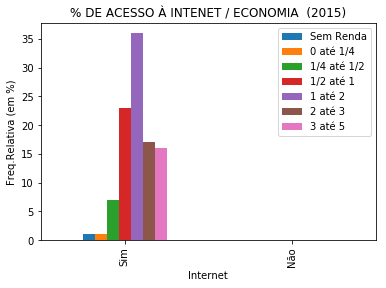

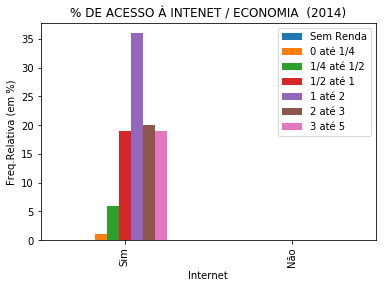

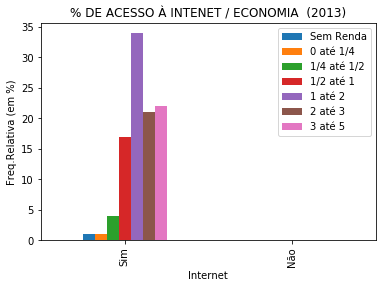

In [135]:
ct10 = pd.crosstab(tabela.ACESSO_À_INTERNET, tabela.ECONOMIA)
ct10 = (ct10/ct10.sum().sum()*100).round(decimals=0)
ct10.plot(kind='bar',title='% DE ACESSO À INTENET / ECONOMIA  (2015)')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Internet')
plt.legend(['Sem Renda','0 até 1/4','1/4 até 1/2','1/2 até 1','1 até 2','2 até 3','3 até 5'])
plt.show()
print('\n')


ct20 = pd.crosstab(tabela2.ACESSO_À_INTERNET, tabela2.ECONOMIA)
ct20 = (ct20/ct20.sum().sum()*100).round(decimals=0)
ct20.plot(kind='bar',title='% DE ACESSO À INTENET / ECONOMIA  (2014)')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Internet')
plt.legend(['Sem Renda','0 até 1/4','1/4 até 1/2','1/2 até 1','1 até 2','2 até 3','3 até 5'])
plt.show()
print('\n')


ct30 = pd.crosstab(tabela3.ACESSO_À_INTERNET, tabela3.ECONOMIA)
ct30 = (ct30/ct30.sum().sum()*100).round(decimals=0)
ct30.plot(kind='bar',title='% DE ACESSO À INTENET / ECONOMIA  (2013)')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Internet')
plt.legend(['Sem Renda','0 até 1/4','1/4 até 1/2','1/2 até 1','1 até 2','2 até 3','3 até 5'])
plt.show()
print('\n')

___
Nos gráficos a baixo podemos analizar a porcentagem do acesso à internet, dos domicílios analizados, perante a cada uma das regiões.

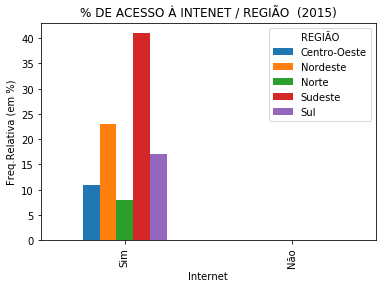

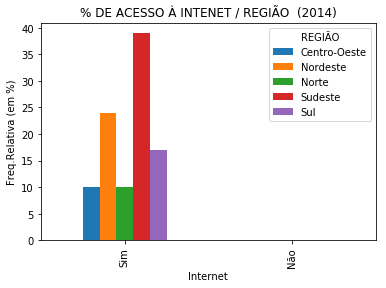

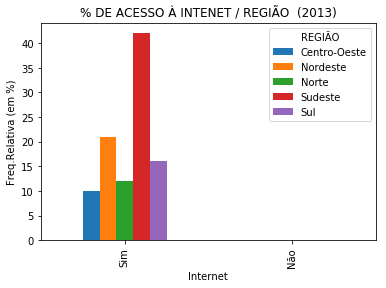

In [136]:
ct12 = pd.crosstab(tabela.ACESSO_À_INTERNET, tabela.REGIÃO)
ct12 = (ct12/ct12.sum().sum()*100).round(decimals=0)
ct12.plot(kind='bar',title='% DE ACESSO À INTENET / REGIÃO  (2015)')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Internet')
plt.show()
print('\n')


ct21 = pd.crosstab(tabela2.ACESSO_À_INTERNET, tabela2.REGIÃO)
ct21 = (ct21/ct21.sum().sum()*100).round(decimals=0)
ct21.plot(kind='bar',title='% DE ACESSO À INTENET / REGIÃO  (2014)')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Internet')
plt.show()
print('\n')


ct31 = pd.crosstab(tabela3.ACESSO_À_INTERNET, tabela3.REGIÃO)
ct31 = (ct31/ct31.sum().sum()*100).round(decimals=0)
ct31.plot(kind='bar',title='% DE ACESSO À INTENET / REGIÃO  (2013)')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Internet')
plt.show()
print('\n')

___
Nos gráficos a baixo podemos analizar a porcentagem do acesso ao sinal digital de televisão, dos domicílios analizados, perante a sua faixa de economia.

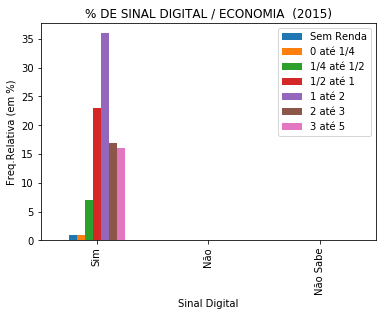

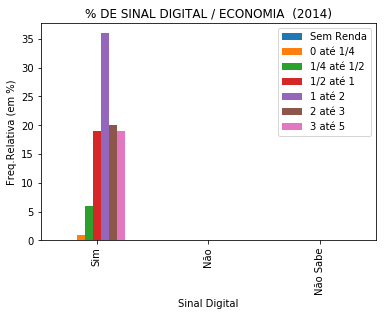

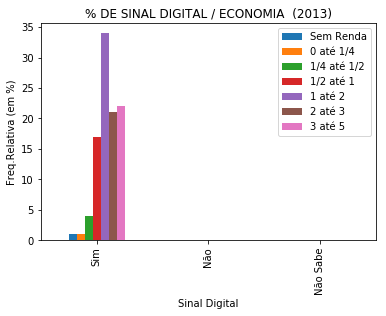

In [137]:
ct11 = pd.crosstab(tabela.SINAL_DIGITAL_E_TV_ABERTA, tabela.ECONOMIA)
ct11 = (ct11/ct11.sum().sum()*100).round(decimals=0)
ct11.plot(kind='bar',title='% DE SINAL DIGITAL / ECONOMIA  (2015)')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Sinal Digital')
plt.legend(['Sem Renda','0 até 1/4','1/4 até 1/2','1/2 até 1','1 até 2','2 até 3','3 até 5'])
plt.show()
print('\n')


ct22 = pd.crosstab(tabela2.SINAL_DIGITAL_E_TV_ABERTA, tabela2.ECONOMIA)
ct22 = (ct22/ct22.sum().sum()*100).round(decimals=0)
ct22.plot(kind='bar',title='% DE SINAL DIGITAL / ECONOMIA  (2014)')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Sinal Digital')
plt.legend(['Sem Renda','0 até 1/4','1/4 até 1/2','1/2 até 1','1 até 2','2 até 3','3 até 5'])
plt.show()
print('\n')


ct32 = pd.crosstab(tabela3.SINAL_DIGITAL_E_TV_ABERTA, tabela3.ECONOMIA)
ct32 = (ct32/ct32.sum().sum()*100).round(decimals=0)
ct32.plot(kind='bar',title='% DE SINAL DIGITAL / ECONOMIA  (2013)')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Sinal Digital')
plt.legend(['Sem Renda','0 até 1/4','1/4 até 1/2','1/2 até 1','1 até 2','2 até 3','3 até 5'])
plt.show()
print('\n')

___
Nos gráficos a baixo podemos analizar a porcentagem do acesso ao sinal digital de televisão, dos domicílios analizados, perante a cada uma das regiões.

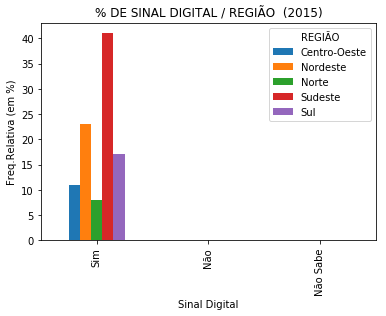

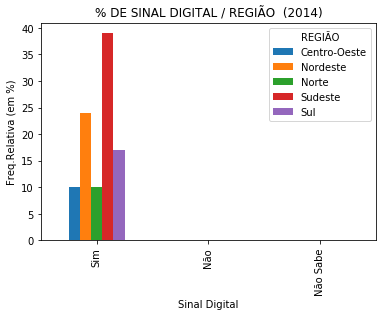

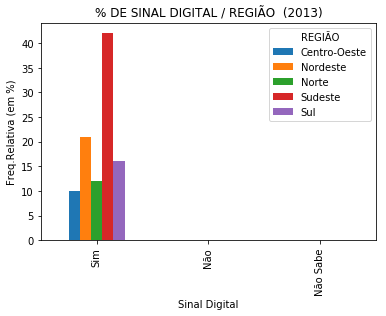

In [138]:
ct13 = pd.crosstab(tabela.SINAL_DIGITAL_E_TV_ABERTA, tabela.REGIÃO)
ct13 = (ct13/ct13.sum().sum()*100).round(decimals=0)
ct13.plot(kind='bar',title='% DE SINAL DIGITAL / REGIÃO  (2015)')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Sinal Digital')
plt.show()
print('\n')


ct23 = pd.crosstab(tabela2.SINAL_DIGITAL_E_TV_ABERTA, tabela2.REGIÃO)
ct23 = (ct23/ct23.sum().sum()*100).round(decimals=0)
ct23.plot(kind='bar',title='% DE SINAL DIGITAL / REGIÃO  (2014)')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Sinal Digital')
plt.show()
print('\n')


ct33 = pd.crosstab(tabela3.SINAL_DIGITAL_E_TV_ABERTA, tabela3.REGIÃO)
ct33 = (ct33/ct33.sum().sum()*100).round(decimals=0)
ct33.plot(kind='bar',title='% DE SINAL DIGITAL / REGIÃO  (2013)')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Sinal Digital')
plt.show()
print('\n')

___
Nos gráficos a baixo podemos analizar a porcentagem do acesso à internet 3G e 4G, dos domicílios analizados, perante a cada uma das regiões.

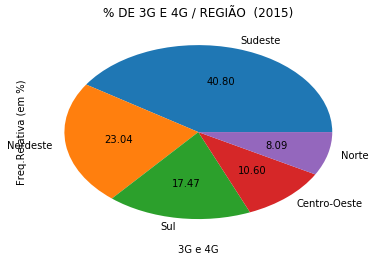

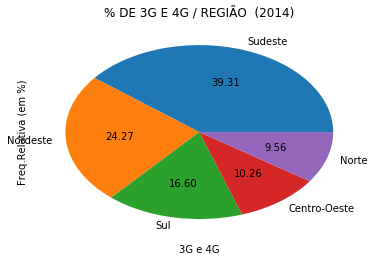

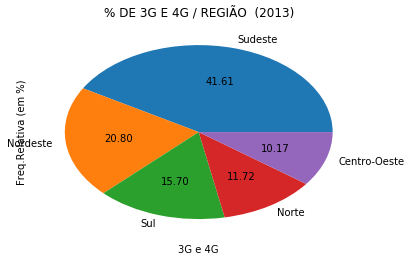

In [139]:
inadim = tabela.REGIÃO[tabela.INTERNET_3G_E_4G == 'Sim'].value_counts()
inadim.plot(kind='pie', autopct="%.2f",legend=False,title='% DE 3G E 4G / REGIÃO  (2015)')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('3G e 4G')
plt.show()


inadim = tabela2.REGIÃO[tabela2.INTERNET_3G_E_4G == 'Sim'].value_counts()
inadim.plot(kind='pie', autopct="%.2f",legend=False,title='% DE 3G E 4G / REGIÃO  (2014)')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('3G e 4G')
plt.show()


inadim = tabela3.REGIÃO[tabela3.INTERNET_3G_E_4G == 'Sim'].value_counts()
inadim.plot(kind='pie', autopct="%.2f",legend=False,title='% DE 3G E 4G / REGIÃO  (2013)')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('3G e 4G')
plt.show()

___
## Calculo das Taxas

Com o calculo das taxas de variações entre os anos, poderemos analizar se ao longo do período analizado, houve-se um aumento ou uma queda no percentual de acesso à internet e sinala digital de televisão em cada um dos estados:

Variação de 2014 - 2015:

In [140]:
print('Internet:')
print('Centro-Oente:'),print((((tabela.shape[0]/100)*10.60098)*100)/((tabela2.shape[0]/100)*10.25686)-100)
print('Nordeste:'),print((((tabela.shape[0]/100)*23.039721)*100)/((tabela2.shape[0]/100)*24.265802)-100)
print('Norte:'),print((((tabela.shape[0]/100)*8.092597)*100)/((tabela2.shape[0]/100)*9.564303)-100)
print('Sudeste:'),print((((tabela.shape[0]/100)*40.798298)*100)/((tabela2.shape[0]/100)*39.309196)-100)
print('Sul:'),print((((tabela.shape[0]/100)*17.468403)*100)/((tabela2.shape[0]/100)*16.60384)-100)
print('\n','\n')

print('Sinal Digital:')
print('Centro-Oente:'),print((((tabela.shape[0]/100)*10.60098)*100)/((tabela2.shape[0]/100)*10.25686)-100)
print('Nordeste:'),print((((tabela.shape[0]/100)*23.039721)*100)/((tabela2.shape[0]/100)*24.265802)-100)
print('Norte:'),print((((tabela.shape[0]/100)*8.092597)*100)/((tabela2.shape[0]/100)*9.564303)-100)
print('Sudeste:'),print((((tabela.shape[0]/100)*40.798298)*100)/((tabela2.shape[0]/100)*39.309196)-100)
print('Sul:'),print((((tabela.shape[0]/100)*17.468403)*100)/((tabela2.shape[0]/100)*16.60384)-100)

Internet:
Centro-Oente:
40.512816240718934
Nordeste:
29.082365918037596
Norte:
15.032070857437418
Sudeste:
41.10169650239274
Sul:
43.0306175315302

 

Sinal Digital:
Centro-Oente:
40.512816240718934
Nordeste:
29.082365918037596
Norte:
15.032070857437418
Sudeste:
41.10169650239274
Sul:
43.0306175315302


(None, None)

Variação de 2013 - 2014:

In [141]:
print('Internet:')
print('Centro-Oente:'),print((((tabela2.shape[0]/100)*10.25686)*100)/((tabela3.shape[0]/100)*10.170118)-100)
print('Nordeste:'),print((((tabela2.shape[0]/100)*24.265802)*100)/((tabela3.shape[0]/100)*20.802515)-100)
print('Norte:'),print((((tabela2.shape[0]/100)*9.564303)*100)/((tabela3.shape[0]/100)*11.723373)-100)
print('Sudeste:'),print((((tabela2.shape[0]/100)*39.309196)*100)/((tabela3.shape[0]/100)*41.60503)-100)
print('Sul:'),print((((tabela2.shape[0]/100)*16.60384)*100)/((tabela3.shape[0]/100)*15.698964)-100)
print('\n','\n')
print('Sinal Digital:')
print('Centro-Oente:'),print((((tabela2.shape[0]/100)*10.25686)*100)/((tabela3.shape[0]/100)*10.170118)-100)
print('Nordeste:'),print((((tabela2.shape[0]/100)*24.265802)*100)/((tabela3.shape[0]/100)*20.802515)-100)
print('Norte:'),print((((tabela2.shape[0]/100)*9.564303)*100)/((tabela3.shape[0]/100)*11.723373)-100)
print('Sudeste:'),print((((tabela2.shape[0]/100)*39.309196)*100)/((tabela3.shape[0]/100)*41.60503)-100)
print('Sul:'),print((((tabela2.shape[0]/100)*16.60384)*100)/((tabela3.shape[0]/100)*15.698964)-100)

Internet:
Centro-Oente:
112.72728357857883
Nordeste:
146.04444502960195
Norte:
72.08202252925688
Sudeste:
99.2888863590795
Sul:
123.08599396531395

 

Sinal Digital:
Centro-Oente:
112.72728357857883
Nordeste:
146.04444502960195
Norte:
72.08202252925688
Sudeste:
99.2888863590795
Sul:
123.08599396531395


(None, None)

Variação de 2013 - 2015:

In [142]:
print('Internet:')
print('Centro-Oente:'),print((((tabela.shape[0]/100)*10.60098)*100)/((tabela3.shape[0]/100)*10.170118)-100)
print('Nordeste:'),print((((tabela.shape[0]/100)*23.039721)*100)/((tabela3.shape[0]/100)*20.802515)-100)
print('Norte:'),print((((tabela.shape[0]/100)*8.092597)*100)/((tabela3.shape[0]/100)*11.723373)-100)
print('Sudeste:'),print((((tabela.shape[0]/100)*40.798298)*100)/((tabela3.shape[0]/100)*41.60503)-100)
print('Sul:'),print((((tabela.shape[0]/100)*17.468403)*100)/((tabela3.shape[0]/100)*15.698964)-100)
print('\n','\n')

print('Sinal Digital:')
print('Centro-Oente:'),print((((tabela.shape[0]/100)*10.60098)*100)/((tabela3.shape[0]/100)*10.170118)-100)
print('Nordeste:'),print((((tabela.shape[0]/100)*23.039721)*100)/((tabela3.shape[0]/100)*20.802515)-100)
print('Norte:'),print((((tabela.shape[0]/100)*8.092597)*100)/((tabela3.shape[0]/100)*11.723373)-100)
print('Sudeste:'),print((((tabela.shape[0]/100)*40.798298)*100)/((tabela3.shape[0]/100)*41.60503)-100)
print('Sul:'),print((((tabela.shape[0]/100)*17.468403)*100)/((tabela3.shape[0]/100)*15.698964)-100)

Internet:
Centro-Oente:
198.90909706864153
Nordeste:
217.59999085411567
Norte:
97.9495140887662
Sudeste:
181.19999959338674
Sul:
219.08127479494073

 

Sinal Digital:
Centro-Oente:
198.90909706864153
Nordeste:
217.59999085411567
Norte:
97.9495140887662
Sudeste:
181.19999959338674
Sul:
219.08127479494073


(None, None)

In [156]:
coluna = ['Internet','Sinal Digital']
linha = ['Centro-Oeste','Nordeste','Norte','Sudeste','Sul']
resultado = pd.DataFrame(np.array([[198.9,198.9],[217.6,217.6],[97.9,97.9],[181.2,181.2],[219.1,219.1]]),index=linha, columns=coluna)
resultado

,Internet,Sinal Digital
Centro-Oeste,198.9,198.9
Nordeste,217.6,217.6
Norte,97.9,97.9
Sudeste,181.2,181.2
Sul,219.1,219.1


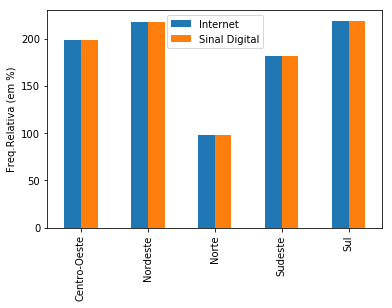

In [155]:
u = (resultado)
plot = u.plot(kind='bar')
plt.ylabel('Freq.Relativa (em %)')
plt.show()

___
## Conclusão 

Descreva aqui suas conclusões!

Após todo esse estudo de analise de dados, filtragem de informação de tabelas e desenvolvimento das informações ultilizadas foi possivel concluir que partir dos dados analisados pelos gráficos e tabelas plotados, nesses ultimos anos (2013 à 2015), tanto o acesso à internet como o acesso oa sinal digital de televisão aumentaram significativamente, quase todos com uma taxa de aumento de 100%. Mas o estado que se sobressaiu forá o Sul, que totalizou uma taxa de aumento de 219%. O estado que menos se sobressaiu forá o estado do Norte, que totalizou uma taxa de aumento de 98%.

O gráfico a baixo apresenta a dencidade de domicílios, conforme as faixas de renda, apresentando a comparação da região Sul (azul) com a região Norte (laranja)

[]

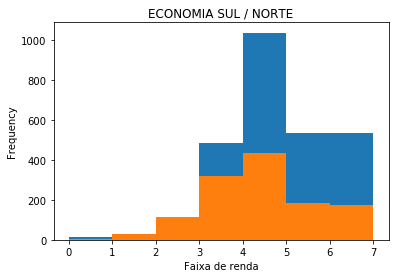

In [157]:
import numpy as np
faixa = np.arange(0,8,1)
plot=tabela.ECONOMIA[(tabela.REGIÃO=='Sul')].plot.hist(bins=faixa,title="ECONOMIA SUL / NORTE")
plt.ylabel('Densidade')
plt.xlabel('Faixa de renda')
plt.plot()

plot=tabela.ECONOMIA[(tabela.REGIÃO=='Norte')].plot.hist(bins=faixa,title="ECONOMIA SUL / NORTE")
plt.plot()